### Import needed necessary packages

In [16]:
import pandas as pd
import numpy as np


In [17]:
df = pd.read_csv("dataframe_.csv")
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [18]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [19]:
df.shape

(1697, 2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [21]:
df.isna().sum()

input     1
output    1
dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.duplicated().sum()

606

In [24]:
df=df.drop_duplicates()


In [25]:
df.shape

(1090, 2)

In [26]:
df.nunique()

input     991
output    969
dtype: int64

In [27]:
df.corr()

,input,output
input,1.000000,0.504471
output,0.504471,1.000000


In [28]:
df.cov()


,input,output
input,6204.586968,2716.879936
output,2716.879936,4674.716079


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


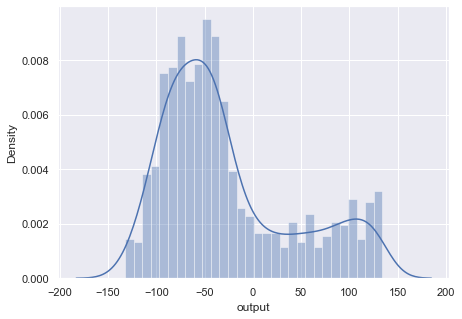

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(df['output'], bins=30)
plt.show()

<AxesSubplot:>

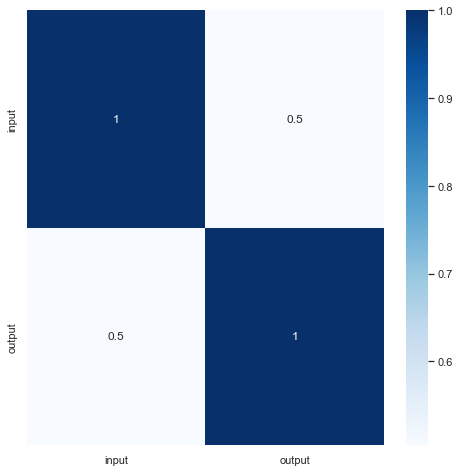

In [30]:
corr = df.corr() 
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True,cmap="Blues")

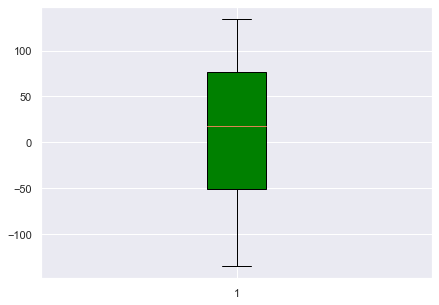

In [39]:
plt.boxplot(df['input'], patch_artist=True, boxprops=dict(facecolor='green'))
plt.show()

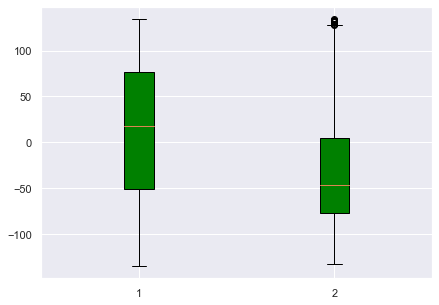

In [97]:
plt.boxplot(df, patch_artist=True, boxprops=dict(facecolor='green'))
plt.show()


In [32]:
X=df['input'].values
Y=df['output'].values
print(X)
Y

[-122.7406674 -121.5314194 -134.917019  ... -109.9421548 -111.5153684
 -110.3442214]


array([-130.5720846, -129.9389289, -130.1418321, ...,  127.1973936,
        128.1708846,  123.0879499])

In [58]:
X=X.reshape(-1, 1)
Y=Y.reshape(-1, 1)



### Linear  Regression model

In [59]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test =train_test_split(X, Y,test_size=0.2, random_state=20)
print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", y_train.shape)
print("ytest shape : ", y_test.shape)
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()

xtrain shape :  (872, 1)
xtest shape :  (218, 1)
ytrain shape :  (872,)
ytest shape :  (218,)


In [61]:
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)


In [64]:
print(y_pred)

[[ 2.67793896e+01]
 [-1.75917669e+01]
 [-4.12983850e-01]
 [ 1.41469355e+01]
 [-3.54812829e+00]
 [-4.12983850e-01]
 [-6.15591823e+01]
 [-3.68304709e+01]
 [-2.95028404e+01]
 [-5.59590613e+01]
 [ 6.15851798e+00]
 [ 2.73627833e+01]
 [-2.79696610e+01]
 [-7.71039272e+01]
 [-4.66378199e+01]
 [-2.22152975e+01]
 [-7.62470451e+01]
 [-2.14065940e+01]
 [ 1.18301004e+01]
 [-2.06454681e+01]
 [-1.96928299e+01]
 [-2.86916348e+01]
 [-6.99415009e+01]
 [-5.69671990e+01]
 [-2.84125210e+01]
 [-3.77755344e+01]
 [-1.26394361e+01]
 [-2.65624189e+01]
 [-8.65296297e+01]
 [ 1.11549238e+01]
 [ 1.15833648e+01]
 [ 1.80099802e+01]
 [-5.13610416e+01]
 [ 4.70601276e+00]
 [-5.07799025e+01]
 [-3.60098265e-02]
 [ 2.05806263e+01]
 [ 8.53147745e+00]
 [ 5.59881057e-01]
 [-1.05134885e+01]
 [-1.54762367e+01]
 [-4.03407359e+01]
 [ 1.23137544e+01]
 [-1.45515376e+01]
 [-2.14065940e+01]
 [-1.62282050e+01]
 [-8.42428023e+01]
 [-6.41115819e+00]
 [ 2.23005886e+00]
 [-1.81949547e+01]
 [-3.44589404e+01]
 [-2.22149339e+01]
 [-4.3392201

In [65]:
print(regressor.intercept_, regressor.coef_)

[-30.24675963] [[0.42844102]]


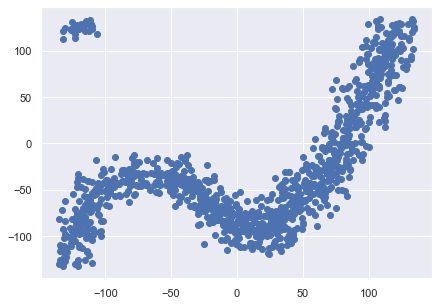

In [74]:
plt.scatter(X, Y)
plt.show()


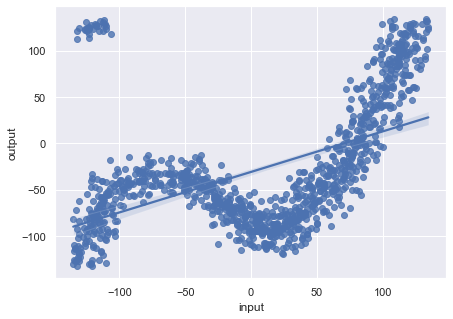

In [71]:
sns.regplot(x="input", y="output", data=df)
plt.show()


In [81]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('\n\n\n Mean Squared error:  ',metrics.mean_squared_error(y_test,y_pred))
print('\n R2 Score: ',metrics.r2_score(y_test,y_pred))
print('\n Root mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 63.53739237319818



 Mean Squared error:   6053.735466131253

 R2 Score:  -0.17336465609561968

 Root mean squared error:  77.80575471089045


###  Support Vector Regression (SVR) model


In [89]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, Y_train)
y1_pred = svr.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y1_pred))
print('\n\n\n Mean Squared error:  ',metrics.mean_squared_error(y_test,y1_pred))
print('\n R2 Score: ',metrics.r2_score(y_test,y1_pred))
print('\n Root mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y1_pred)))

Mean Absolute Error: 65.79437456342657



 Mean Squared error:   7740.63937169376

 R2 Score:  -0.5003286326503551

 Root mean squared error:  87.9809034489517


### DecisionTreeRegressor model

In [94]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
y2_pred = model.predict(X_test)

In [96]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y2_pred))
print('\n\n\n Mean Squared error:  ',metrics.mean_squared_error(y_test,y2_pred))
print('\n R2 Score: ',metrics.r2_score(y_test,y2_pred))
print('\n Root mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y2_pred)))

Mean Absolute Error: 59.504469039888505



 Mean Squared error:   5663.699569253648

 R2 Score:  -0.0977659883696893

 Root mean squared error:  75.25755489818712


## compare the above three model DecisionTreeRegressor best results so using decision tree regression is best in my POV